<a href="https://colab.research.google.com/github/maitreya-v/Audio-Classification-Librosa/blob/main/Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf

# Check if a GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU found")

# Set TensorFlow to use GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Enable GPU memory growth
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth enabled")
    except RuntimeError as e:
        print(e)


Default GPU Device: /device:GPU:0
GPU memory growth enabled


In [8]:
import tensorflow as tf

# Check if a GPU is available and print its name
if tf.test.is_gpu_available():
    print("Default GPU Device: {}".format(tf.test.gpu_device_name()))
else:
    print("No GPU available")



Default GPU Device: /device:GPU:0


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# /content/drive/MyDrive/audio

In [14]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [15]:
audio_df=pd.read_csv('./UrbanSound8K.csv')

In [16]:
audio_df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [17]:
filename='/content/drive/MyDrive/audio/fold1/101415-3-0-2.wav'
data,sr=librosa.load(filename)

In [18]:
data

array([-0.00011485, -0.00017083, -0.00017736, ..., -0.04609928,
       -0.04609471, -0.05099387], dtype=float32)

In [19]:
sr

22050

In [20]:
ipd.Audio(filename)

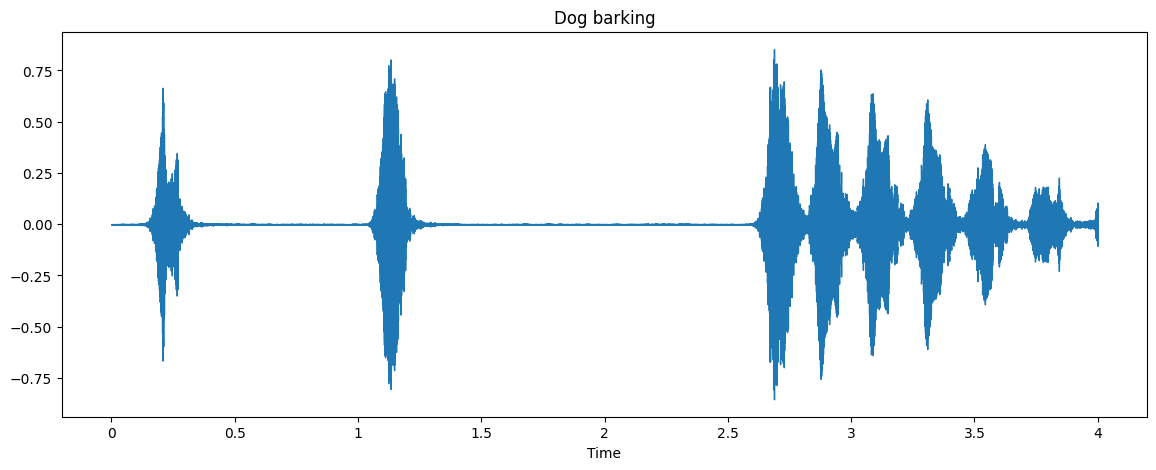

In [21]:
plt.figure(figsize=(14,5))
data,sr=librosa.load(filename)
librosa.display.waveshow(data,sr=sr)
plt.title('Dog barking')
plt.show()

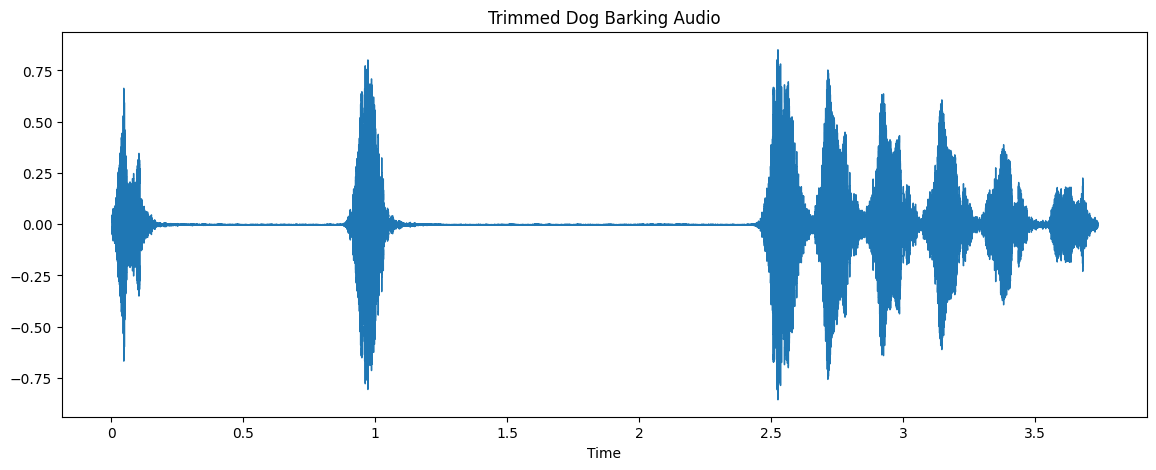

In [22]:
data_trimmed,unknown=librosa.effects.trim(data,top_db=20)
plt.figure(figsize=(14,5))
plt.title('Trimmed Dog Barking Audio')
librosa.display.waveshow(data_trimmed)

In [23]:
audio_df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [24]:
audio_df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [25]:
mfcc_feature=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=20)

In [26]:
scaled_feature = np.mean(mfcc_feature.T,axis=0)
scaled_feature

array([-402.43027   ,   92.26344   ,   19.303581  ,  -13.194188  ,
         -5.806574  ,    2.4085865 ,  -14.885645  ,   -8.070934  ,
         -9.417303  ,   -6.220677  ,    0.9733784 ,   -5.7620926 ,
          1.6563414 ,    0.6724615 ,    0.96400744,    5.7375946 ,
          3.1241565 ,    3.0485227 ,   -4.208719  ,   -3.6097052 ],
      dtype=float32)

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(mfcc_feature)

array([[-4.3569407 , -4.352619  , -4.3510423 , ..., -4.148976  ,
        -4.0010867 , -3.9175432 ],
       [ 0.28264374,  0.33563253,  0.33577046, ...,  1.3058491 ,
         1.7818948 ,  1.9812868 ],
       [ 0.2794796 ,  0.32680938,  0.3283954 , ...,  0.8145716 ,
         0.7129683 ,  0.61449057],
       ...,
       [ 0.19639774,  0.17900771,  0.16339327, ...,  0.1669734 ,
         0.16736487,  0.13025868],
       [ 0.19442877,  0.179896  ,  0.16330358, ...,  0.1865136 ,
         0.15609665,  0.15143068],
       [ 0.19232057,  0.1807361 ,  0.16494904, ...,  0.12867133,
         0.10769587,  0.16999114]], dtype=float32)

In [28]:
audio_df.iloc[0]['slice_file_name']

'100032-3-0-0.wav'

In [29]:
def get_path(index):
  standard_path='/content/drive/MyDrive/audio/fold'
  folder_id=audio_df.iloc[index]['fold']
  filename=audio_df.iloc[index]['slice_file_name']
  full_path=str(standard_path) + str(folder_id) + '/' + str(filename)
  return full_path

In [30]:
L=[]
for index,row in tqdm(audio_df.iterrows()):
    path=get_path(index)
    data,sr=librosa.load(path)
    mfcc_feature=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=40)
    mfcc_scaled_feature=sc.fit_transform(mfcc_feature)
    df_dict={'feature':mfcc_scaled_feature,'class':row['class']}
    L.append(df_dict)

3555it [46:08,  1.36it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [1:46:00,  1.32it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [1:46:00,  1.41it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8328it [1:46:01,  1.44it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8329it [1:46:02,  1.46it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [1:51:09,  1.31it/s]


In [39]:
final_df=pd.DataFrame(L)
L

[{'feature': array([[-5.44329834e+00, -4.21162128e+00, -2.65373397e+00,
          -1.66795778e+00, -1.14298272e+00, -1.51225948e+00,
          -3.01733780e+00, -4.40069389e+00, -5.05510092e+00,
          -5.41531420e+00, -5.64721251e+00, -5.75349569e+00,
          -5.82985115e+00, -5.91411352e+00],
         [ 2.22916079e+00,  2.43811226e+00,  2.29312944e+00,
           2.00009727e+00,  1.69139481e+00,  1.48895347e+00,
           1.32804966e+00,  1.31201959e+00,  1.35645068e+00,
           1.42122316e+00,  1.47959626e+00,  1.52875268e+00,
           1.51863980e+00,  1.49679208e+00],
         [-1.54851294e+00, -2.91014242e+00, -3.93176293e+00,
          -4.46611786e+00, -4.82381010e+00, -4.87463713e+00,
          -4.37953424e+00, -3.51521134e+00, -2.84591150e+00,
          -2.36938810e+00, -1.90439391e+00, -1.63727558e+00,
          -1.42066181e+00, -1.16541076e+00],
         [-6.93902314e-01, -1.38392627e+00, -2.12167645e+00,
          -2.44007134e+00, -2.41076612e+00, -2.37667990e+00,


In [34]:
from google.colab import files
final_df.to_csv('scaled_audio_feature.csv', index=False)
files.download('scaled_audio_feature.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
scaled_audio_feature=pd.read_csv('./scaled_audio_feature.csv')

In [36]:
scaled_audio_feature.head()

,feature,class
0,[[-5.44329834e+00 -4.21162128e+00 -2.65373397e...,dog_bark
1,[[-6.1133404 -6.0766253 -6.0685463 ... -6.0...,children_playing
2,[[-6.05140066e+00 -6.01322508e+00 -6.03398037e...,children_playing
3,[[-6.01370478e+00 -5.98692942e+00 -5.97379971e...,children_playing
4,[[-6.018769 -5.997816 -6.0103536 ... -5.9...,children_playing


In [42]:
scaled_audio_feature['feature'][0]

'[[-5.44329834e+00 -4.21162128e+00 -2.65373397e+00 -1.66795778e+00\n  -1.14298272e+00 -1.51225948e+00 -3.01733780e+00 -4.40069389e+00\n  -5.05510092e+00 -5.41531420e+00 -5.64721251e+00 -5.75349569e+00\n  -5.82985115e+00 -5.91411352e+00]\n [ 2.22916079e+00  2.43811226e+00  2.29312944e+00  2.00009727e+00\n   1.69139481e+00  1.48895347e+00  1.32804966e+00  1.31201959e+00\n   1.35645068e+00  1.42122316e+00  1.47959626e+00  1.52875268e+00\n   1.51863980e+00  1.49679208e+00]\n [-1.54851294e+00 -2.91014242e+00 -3.93176293e+00 -4.46611786e+00\n  -4.82381010e+00 -4.87463713e+00 -4.37953424e+00 -3.51521134e+00\n  -2.84591150e+00 -2.36938810e+00 -1.90439391e+00 -1.63727558e+00\n  -1.42066181e+00 -1.16541076e+00]\n [-6.93902314e-01 -1.38392627e+00 -2.12167645e+00 -2.44007134e+00\n  -2.41076612e+00 -2.37667990e+00 -2.15667653e+00 -1.67399788e+00\n  -1.32580507e+00 -9.28176403e-01 -6.75103009e-01 -5.32633543e-01\n  -4.57104504e-01 -3.68241400e-01]\n [-2.82974124e-01 -4.78879094e-01 -5.06552458e-01 -

In [43]:
X=np.array(scaled_audio_feature['feature'].tolist())

(8732,)